# NCR District 4 Population Estimation

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

### Retrieve Data

In [2]:
ncr_df = pd.read_csv('data/ncr_cities.csv')
ncr_df.head()

,city,1990,2000,2010,2015,2020,district
0,Manila,1601234,1581082,1652171,1780148,1846513,1
1,Mandaluyong,248143,278474,328699,386276,425758,2
2,Marikina,310227,391170,424150,450741,456059,2
3,Pasig,397679,505058,669773,755300,803159,2
4,Quezon City,1669776,2173831,2761720,2936116,2960048,2


### Prepare the dataset

In [3]:
dist4_df = ncr_df[ncr_df.district == 4].drop(columns='district')
dist4_df

,city,1990,2000,2010,2015,2020
10,Las Piñas,297102,472780,552573,588894,606293
11,Makati,453170,471379,529039,582602,629616
12,Muntinlupa,278411,379310,459941,504509,543445
13,Parañaque,308236,449811,588126,665822,689992
14,Pasay,368366,354908,392869,416522,440656
15,Pateros,51409,57407,64147,63840,65227
16,Taguig,266637,467375,644473,804915,886722


In [4]:
dist4_melt_df = dist4_df.melt(id_vars=['city'], var_name='year', value_name='population')

In [5]:
cities = dist4_melt_df['city'].unique()
cities

array(['Las Piñas', 'Makati', 'Muntinlupa', 'Parañaque', 'Pasay',
       'Pateros', 'Taguig'], dtype=object)

### Prototype a model predictor using one city

In [6]:
makati = dist4_melt_df[dist4_melt_df.city == 'Makati'].drop(columns='city')
makati

,year,population
1,1990,453170
8,2000,471379
15,2010,529039
22,2015,582602
29,2020,629616


In [7]:
X = makati.year.values.reshape(-1,1)
y = makati.population.values.reshape(-1,1)
makati_model = LinearRegression()
makati_model.fit(X,y)

LinearRegression()

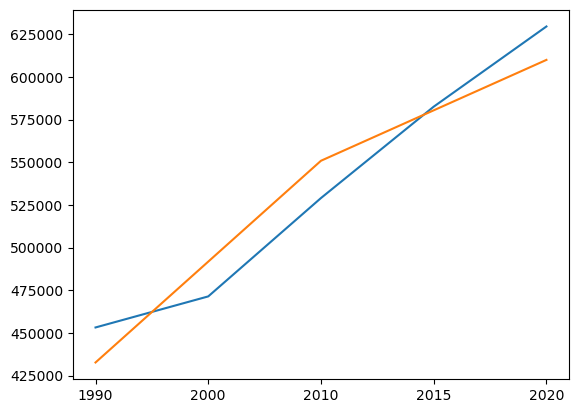

In [8]:
plt.plot(makati.year, makati.population)
plt.plot(makati.year, makati_model.predict(makati.year.values.reshape(-1,1)))

In [9]:
makati_model.predict(np.array([[2025]]))

array([[639590.79310345]])

### Make a subroutine for making the estimates

In [10]:
def make_2025_estimates(data, cities, save_loc='.'):
    
    estimates_2025 = {
        'city': cities,
        'population': []
    }
    
    for i in range(len(cities)):
        city_data = data[data.city == cities[i]].drop(columns='city')
        X = city_data.year.values.reshape(-1,1)
        y = city_data.population.values.reshape(-1,1)
        model = LinearRegression()
        model.fit(X,y)
        
        estimates = model.predict(np.array([[2025]])).ravel()[0]
        
        estimates_2025['population'].append(int(estimates))
        
    estimates_df = pd.DataFrame(estimates_2025)
    estimates_df.to_csv(f'{save_loc}\dist4_2025_estimates.csv', index=False)
                        
    return estimates_df

In [12]:
estimates = make_2025_estimates(dist4_melt_df, cities, 'data')